In [1]:
%load_ext autoreload
%autoreload 2
import os
import sys
module_path = os.path.abspath(os.path.join('../..'))
if module_path not in sys.path:
    sys.path.append(module_path)
os.getcwd()

'/scratch/anissa.el/MacroMicroNichesElMarrahi2022/data_analysis/notebooks/keren_building_blocks_analysis'

In [2]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from src.CellAbundance import CellAbundance, join_abundance_matrices, generate_abundance_matrix
from src.utils.archetypes import ArchetypalAnalysis
from src.utils.visualization import plot_eigenvalues, plot_scatter_pca, plot_3Dscatter_pca, archetypes_bar_plot, archetype_simple_plot
from src.utils.equations import arch2color, alfa2rgb, scale, color_mapper
from src.Cell import group_map

## Unstructured - Normal counting

In [4]:
'''
CELL_TYPES = ['CD8-T', 'Other immune', 'DC / Mono', 'CD3-T', 'B', 'NK', 'Keratin-positive tumor', 'Tumor', 
              'CD4-T', 'Mesenchymal-like', 'Macrophages', 'Endothelial', 'Tregs', 'Unidentified', 'DC', 'Mono / Neu', 
              'Neutrophils']
#patient_ids = [1, 2, 3, 4, 5]
patient_ids = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41]
N_SITE = 100
RADIUS = 100
ROOT_DATA_PATH =  "/srv/mfs/hausserlab/fabio/output/cell_positions_data" #"../../../output/cell_positions_data"

abs_log_ca_list = generate_abundance_matrix(CELL_TYPES, patient_ids, N_SITE, RADIUS, method='abs', snr=3, root=ROOT_DATA_PATH)
sites, patients_ids, _ = join_abundance_matrices(abs_log_ca_list)

sites = sites * np.pi * RADIUS ** 2

pca_original = PCA()
pc_original = pca_original.fit_transform(sites)
'''

CELL_TYPES = ['CD8-T', 'Other immune', 'DC / Mono', 'CD3-T', 'B', 'NK', 'Keratin-positive tumor', 'Tumor', 
              'CD4-T', 'Mesenchymal-like', 'Macrophages', 'Endothelial', 'Tregs', 'Unidentified', 'DC', 'Mono / Neu', 
              'Neutrophils']
#patient_ids = [1, 2, 3, 4, 5]
patient_ids = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41]
N_SITE = 100
RADIUS = 100
ROOT_DATA_PATH = "../../data/cell_positions_data"#"../../../output/cell_positions_data"

abs_log_ca_list = generate_abundance_matrix(CELL_TYPES, patient_ids, N_SITE, RADIUS, method='abs', snr=3, root=ROOT_DATA_PATH)
sites, patients_ids,s_ids, _ = join_abundance_matrices(abs_log_ca_list)

#sites = sites * np.pi * RADIUS ** 2

pca_original = PCA()
pc_original = pca_original.fit_transform(sites)






In [6]:
'''
cellData = pd.read_csv("/srv/mfs/hausserlab/fabio/david_data/cellData.csv")#pd.read_csv("../../../david_data/cellData.csv")
pixel2um_conversion = 0.39 # 1 pixel equal 0.39 micrometer?
cellData['cell_type'] = cellData.apply(lambda x: group_map(x.Group, x.immuneGroup), axis = 1)
size_pixel = cellData.groupby('cell_type')['cellSize'].mean() * pixel2um_conversion**2
a = np.array([size_pixel[x] for x in CELL_TYPES])
'''
cellData = pd.read_csv("../../data/cellData.csv")#("../../../david_data/cellData.csv")
pixel2um_conversion = 0.39
cellData['cell_type'] = cellData.apply(lambda x: group_map(x.Group, x.immuneGroup), axis = 1)
size_pixel = cellData.groupby('cell_type')['cellSize'].mean() * pixel2um_conversion**2
a = np.array([size_pixel[x] for x in CELL_TYPES])



In [7]:
poisson_exp_variance = []
iterations = 100
n_sites_sample = 4000
for i in range(iterations):
    poisson_mean = sites.mean(0)
    generated_sites = np.random.poisson(lam=poisson_mean, size=(n_sites_sample, len(poisson_mean)))
    checked_sites = generated_sites[np.dot(generated_sites, a) < RADIUS**2*np.pi]
    #print(checked_sites.shape)
    #print(checked_sites.mean(0))
    pca = PCA()
    pc = pca.fit_transform(checked_sites)
    poisson_exp_variance.append(pca.explained_variance_)


'''
poisson_exp_variance = []
iterations = 100
n_sites_sample = 100

for i in range(iterations):
    poisson_mean = sites.mean(0)
    print(poisson_mean)
    generated_sites = np.random.poisson(lam=poisson_mean, size=(n_sites_sample, len(poisson_mean)))
    print(np.dot(generated_sites, a))
    #print(generated_sites)
    print(RADIUS**2*np.pi)
    checked_sites = generated_sites[np.dot(generated_sites, a) < RADIUS**2*np.pi]
    print(checked_sites)
    pca = PCA()
    pc = pca.fit_transform(checked_sites)
    poisson_exp_variance.append(pca.explained_variance_)
'''

'\npoisson_exp_variance = []\niterations = 100\nn_sites_sample = 100\n\nfor i in range(iterations):\n    poisson_mean = sites.mean(0)\n    print(poisson_mean)\n    generated_sites = np.random.poisson(lam=poisson_mean, size=(n_sites_sample, len(poisson_mean)))\n    print(np.dot(generated_sites, a))\n    #print(generated_sites)\n    print(RADIUS**2*np.pi)\n    checked_sites = generated_sites[np.dot(generated_sites, a) < RADIUS**2*np.pi]\n    print(checked_sites)\n    pca = PCA()\n    pc = pca.fit_transform(checked_sites)\n    poisson_exp_variance.append(pca.explained_variance_)\n'

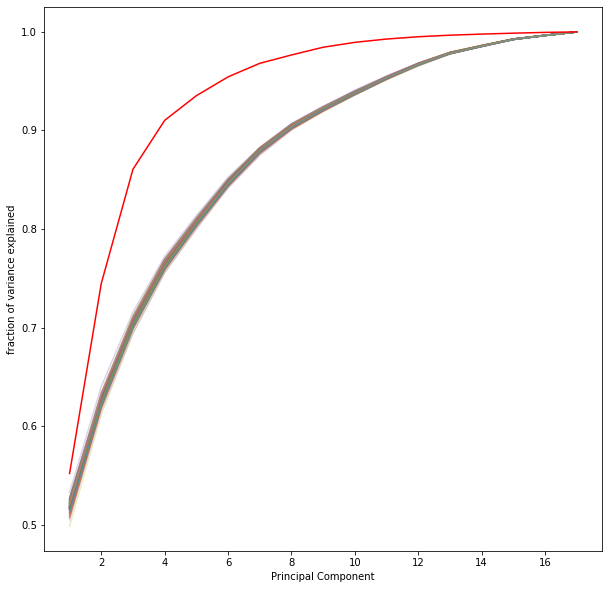

In [8]:
plot_eigenvalues(poisson_exp_variance, pca_original.explained_variance_)

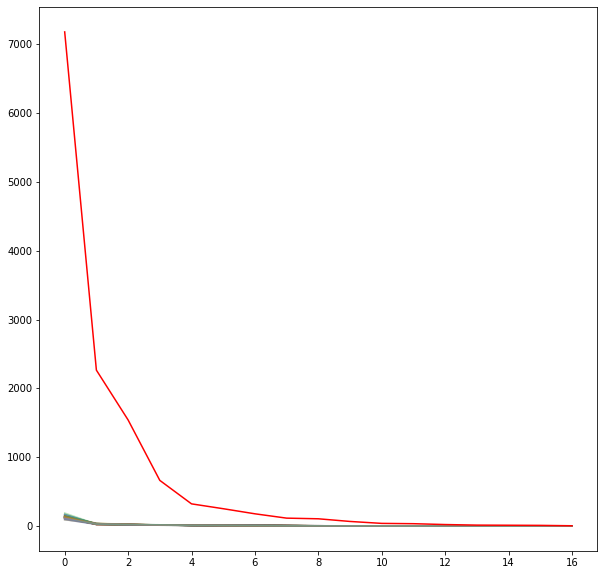

In [36]:
plot_eigenvalues(poisson_exp_variance, pca_original.explained_variance_)

## Unstructured Gaussian Counting

In [5]:
CELL_TYPES = ['CD8-T', 'Other immune', 'DC / Mono', 'CD3-T', 'B', 'NK', 'Keratin-positive tumor', 'Tumor', 
              'CD4-T', 'Mesenchymal-like', 'Macrophages', 'Endothelial', 'Tregs', 'Unidentified', 'DC', 'Mono / Neu', 
              'Neutrophils']
#patient_ids = [1, 2, 3, 4, 5]
patient_ids = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41]
N_SITE = 100
RADIUS = 25
ROOT_DATA_PATH = "../../data/cell_positions_data" #"../../../output/cell_positions_data"

gaussian_ca_list = generate_abundance_matrix(CELL_TYPES, patient_ids, N_SITE, RADIUS, method='gaussian', snr=3, root=ROOT_DATA_PATH)
sites, patients_ids,s_ids, _ = join_abundance_matrices(gaussian_ca_list)

sites = sites * np.pi * RADIUS**2

pca_original = PCA()
pc_original = pca_original.fit_transform(sites)

In [6]:
cellData = pd.read_csv("../../data/cellData.csv")#pd.read_csv("../../../david_data/cellData.csv")
pixel2um_conversion = 0.39
cellData['cell_type'] = cellData.apply(lambda x: group_map(x.Group, x.immuneGroup), axis = 1)
size_pixel = cellData.groupby('cell_type')['cellSize'].mean() * pixel2um_conversion**2
a = np.array([size_pixel[x] for x in CELL_TYPES])

In [19]:
#poisson_mean * np.pi * RADIUS ** 2

In [7]:
poisson_exp_variance = []
iterations = 100
n_sites_sample = 200

for i in range(iterations):
    poisson_mean = sites.mean(0)
    generated_sites = np.random.poisson(lam=poisson_mean, size=(n_sites_sample, len(poisson_mean)))
    #print(generated_sites.shape)
    checked_sites = generated_sites[np.dot(generated_sites, a) < RADIUS**2*np.pi]
    #print(len(checked_sites))
    pca = PCA()
    pc = pca.fit_transform(checked_sites)
    poisson_exp_variance.append(pca.explained_variance_)
    
    
'''
normal_exp_variance= []
for i in range(iterations):
    mu_ = sites.mean(0)
    sig_ = sites.std(0)
    generated_sites = np.random.normal(loc=0, scale=1,size=(n_sites_sample, len(mu_)))
    checked_sites = generated_sites[np.dot(generated_sites, a) < RADIUS**2*np.pi]
    pca = PCA()
    #print(len(checked_sites))
    pc = pca.fit_transform(checked_sites)
    normal_exp_variance.append(pca.explained_variance_)
'''
#from scipy import stats
#shap1 = stats.shapiro(sites[10,:])
#print(shap1)
#print(np.mean(sites.mean(0)))
#print(np.mean(sites.std(0)))
#plot_eigenvalues(normal_exp_variance, pca_original.explained_variance_)

'\nnormal_exp_variance= []\nfor i in range(iterations):\n    mu_ = sites.mean(0)\n    sig_ = sites.std(0)\n    generated_sites = np.random.normal(loc=0, scale=1,size=(n_sites_sample, len(mu_)))\n    checked_sites = generated_sites[np.dot(generated_sites, a) < RADIUS**2*np.pi]\n    pca = PCA()\n    #print(len(checked_sites))\n    pc = pca.fit_transform(checked_sites)\n    normal_exp_variance.append(pca.explained_variance_)\n'

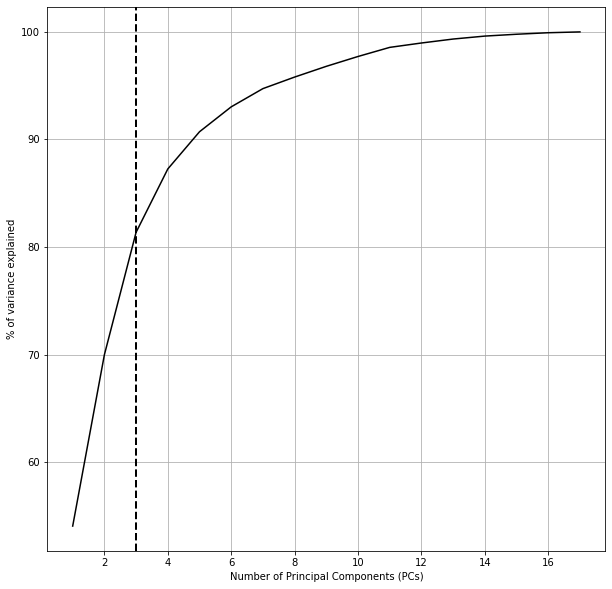

In [8]:
plot_eigenvalues(None, pca_original.explained_variance_,path_fig="/scratch/anissa.el/figs/fig2/plot_eigen_values_gaussian.svg")

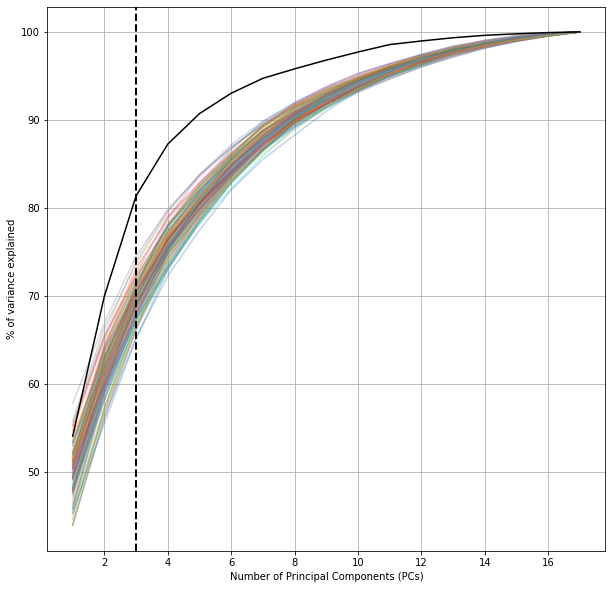

In [9]:
plot_eigenvalues(poisson_exp_variance, pca_original.explained_variance_)

# Gradient Analysis (Waterpaiting / Paint by number)

In [27]:
CELL_TYPES = ['CD8-T', 'Other immune', 'DC / Mono', 'CD3-T', 'B', 'NK', 'Keratin-positive tumor', 'Tumor', 
              'CD4-T', 'Mesenchymal-like', 'Macrophages', 'Endothelial', 'Tregs', 'Unidentified', 'DC', 'Mono / Neu', 
              'Neutrophils']
#patient_ids = [1, 2, 3, 4, 5]
patient_ids = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41]
N_SITE = 500
RADIUS = 15
ROOT_DATA_PATH = "../../data/cell_positions_data"
PC_components = 3

abs_log_ca_list = generate_abundance_matrix(CELL_TYPES, patient_ids, N_SITE, RADIUS, method='gaussian', snr=3, root=ROOT_DATA_PATH)
sites, patients_ids, gradients = join_abundance_matrices(abs_log_ca_list)

std_sites = (sites - sites.mean(0)) / sites.std(0)
#k = 3
#std_sites = np.log(sites + k)

pca_original = PCA()
pc_original = pca_original.fit_transform(sites)

In [16]:
CELL_TYPES = ['CD8-T', 'Other immune', 'DC / Mono', 'CD3-T', 'B', 'NK', 'Keratin-positive tumor', 'Tumor', 
              'CD4-T', 'Mesenchymal-like', 'Macrophages', 'Endothelial', 'Tregs', 'Unidentified', 'DC', 'Mono / Neu', 
              'Neutrophils']
#patient_ids = [1, 2, 3, 4, 5]
patient_ids = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41]
N_SITE = 1500
RADIUS = 25
ROOT_DATA_PATH = "../../data/cell_positions_data"
PC_components = 3

abs_log_ca_list = generate_abundance_matrix(CELL_TYPES, patient_ids, N_SITE, RADIUS, method='gaussian', snr=3, root=ROOT_DATA_PATH)
sites_25, patients_ids, gradients_25 = join_abundance_matrices(abs_log_ca_list)

std_sites_25 = (sites_25 - sites_25.mean(0)) / sites_25.std(0)
#k = 3
#std_sites = np.log(sites + k)

pca_original_25 = PCA()
pc_original_25 = pca_original_25.fit_transform(std_sites_25)

In [27]:
print(sites.shape)
sites[:, 6][ sites[:, 6] < 1].shape
np.nan < 1
np.isnan(sites[:, 6]).any()

(4000, 17)


False

In [11]:
print(gradients_25[:, 4])
print(sites_25[:, 4])

[2.88846824e-06 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
 0.00000000e+00 4.38828908e-06]
[4.22642561e-04 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
 0.00000000e+00 6.72160665e-05]


In [24]:
from scipy.optimize import nnls
def get3dto2dProjectionMatrix(Rs, binEdges):
    primitiveFun = -np.sqrt( np.fmax(1 - (binEdges[:, np.newaxis] / Rs[np.newaxis, :])**2, 0) )
    return  np.diff( primitiveFun, axis=0 )

def get3dto2dProjectionMatrix(RBinEdges, rBinEdges):
    sqrt = np.sqrt( np.fmax((RBinEdges**2)[np.newaxis, :] - (rBinEdges**2)[:, np.newaxis], 0) )
    primitiveFun = - sqrt - rBinEdges[:, np.newaxis] * np.arctan2(rBinEdges[:, np.newaxis], sqrt)
    return np.diff(np.diff( primitiveFun, axis=0 ), axis=1) / np.diff(RBinEdges)[np.newaxis, :]

def invert3dTo2dProjection(RBinEdges, rBinEdges, counts):
    weights = 1 / np.sqrt(counts + 1)
    return nnls( weights[:, np.newaxis]*get3dto2dProjectionMatrix(RBinEdges, rBinEdges), weights*counts)[0]

def plotHist(binEdges, counts, ls='-'):
    plt.plot(np.repeat(binEdges, 2)[1:-1], np.repeat(counts/np.diff(binEdges), 2), ls)

In [22]:
nCellCountBins = 80
nGradientNormBins = 50
countBinEdges = np.linspace(0, 2e-2, nCellCountBins + 1)
gradientBinEdges = np.linspace(0, 3e-4, nGradientNormBins + 1)
gradientBinEdgeCenters = gradientBinEdges[:-1] + gradientBinEdges[1]/2
histograms = []
for i in range(len(CELL_TYPES)):
    H, _, _ = np.histogram2d(sites[:, i], gradients[:, i], bins=(countBinEdges, gradientBinEdges))
    histograms.append(H)

(50,)
(50,)
[410.74934639   0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.        ]


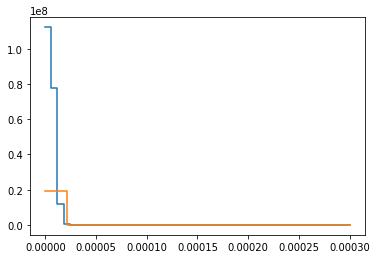

In [25]:
print(gradientBinEdgeCenters.shape)
print(histograms[4][5, :].shape)

ctIdx = 4
slic = 1
RbinEdges = np.linspace(0, 3e-4, 15)
counts3d = invert3dTo2dProjection(RbinEdges, gradientBinEdges, histograms[ctIdx][slic, :])
#M*x = b
#x.shape = 15
#b.shape = 50


#plt.plot(gradientBinEdgeCenters, histograms[ctIdx][slic, :])
#plt.plot(Rs, counts3d)
#plt.show()
print(counts3d)
plotHist(gradientBinEdges, histograms[ctIdx][slic, :])
plotHist(RbinEdges, counts3d)

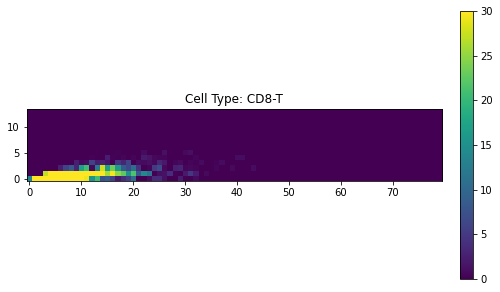

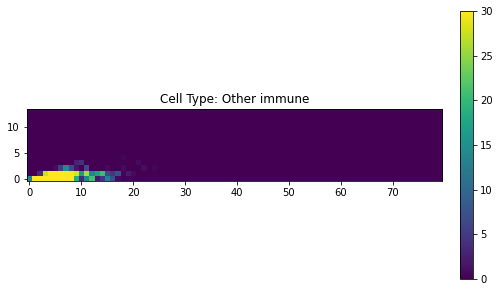

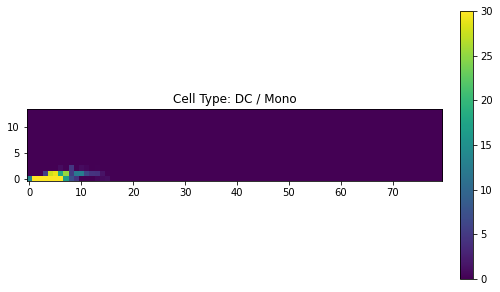

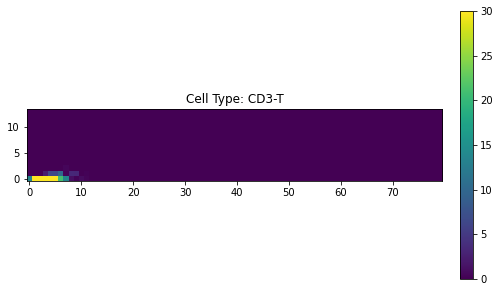

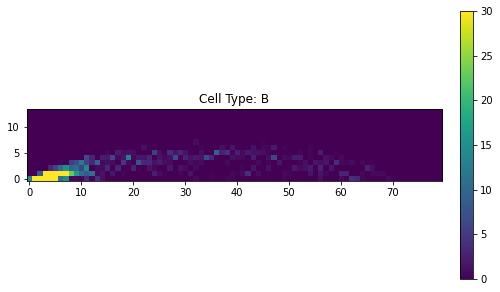

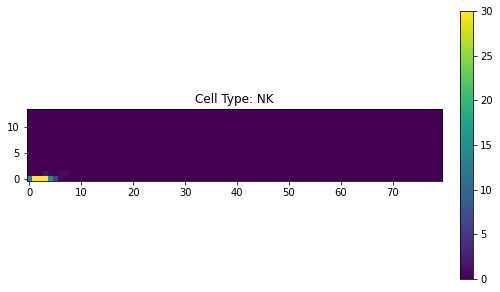

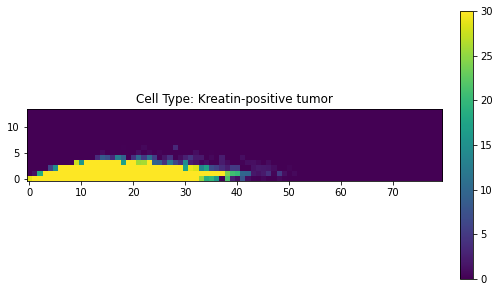

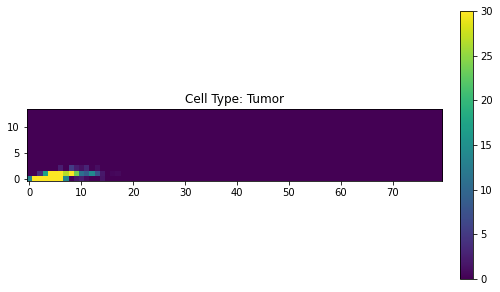

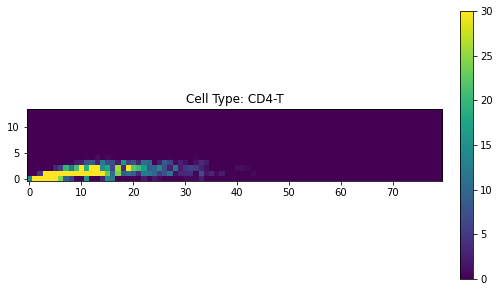

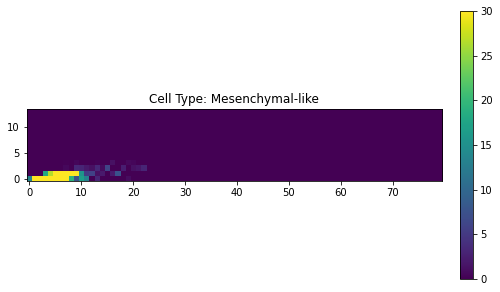

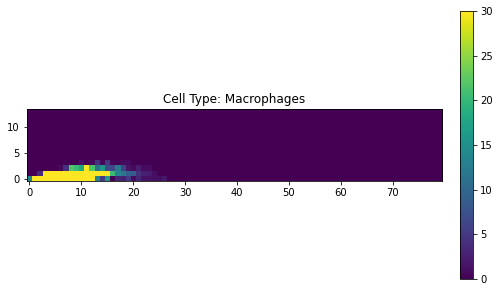

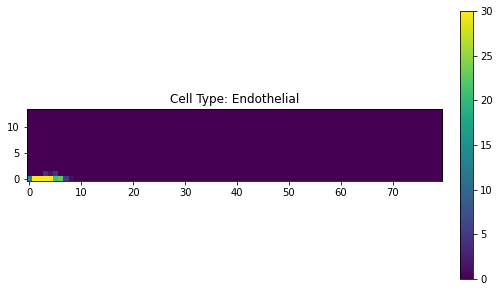

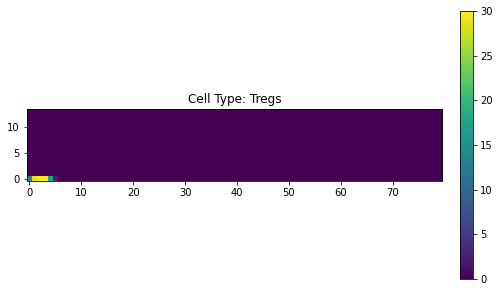

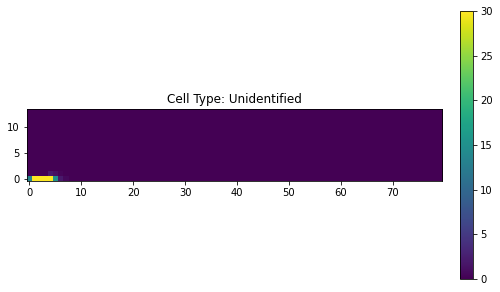

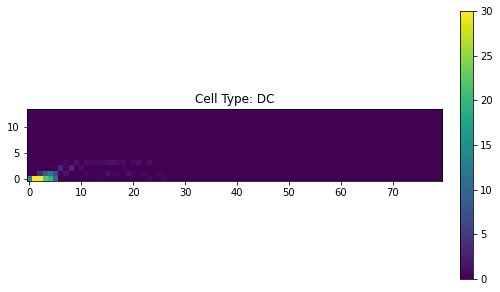

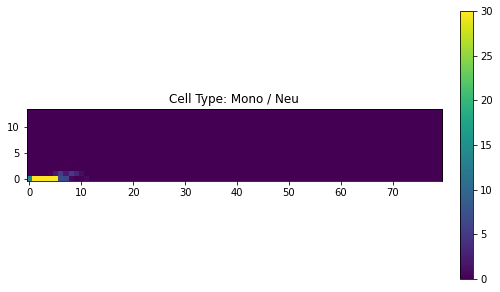

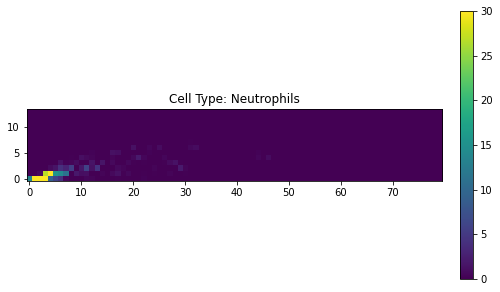

In [26]:
eps = 0.00000001
#plt.figure(figsize=(30, 50))
for ctIdx in range(len(CELL_TYPES)):
    #plt.subplot(5, 5, ctIdx+1)
    plt.figure(figsize=(8, 8))
    plt.title("Cell Type: {}".format(CELL_TYPES[ctIdx]))
    
    counts3d_matx = []
    for slic in range(nCellCountBins):
        RbinEdges = np.linspace(0, 3e-4, 15)
        counts3d = invert3dTo2dProjection(RbinEdges, gradientBinEdges, histograms[ctIdx][slic, :])
        counts3d_matx.append(counts3d)
    counts3d_matx = np.array(counts3d_matx).T
    plt.imshow(counts3d_matx, origin='lower')
    #plt.xticks(countBinEdges)
    #plt.yticks(RbinEdges)
    #plt.xticklabels(countBinEdges)
    #plt.yticklabels(RbinEdges)
    plt.clim(0, 30)
    plt.colorbar(fraction=0.03, pad=0.04)
    plt.show()

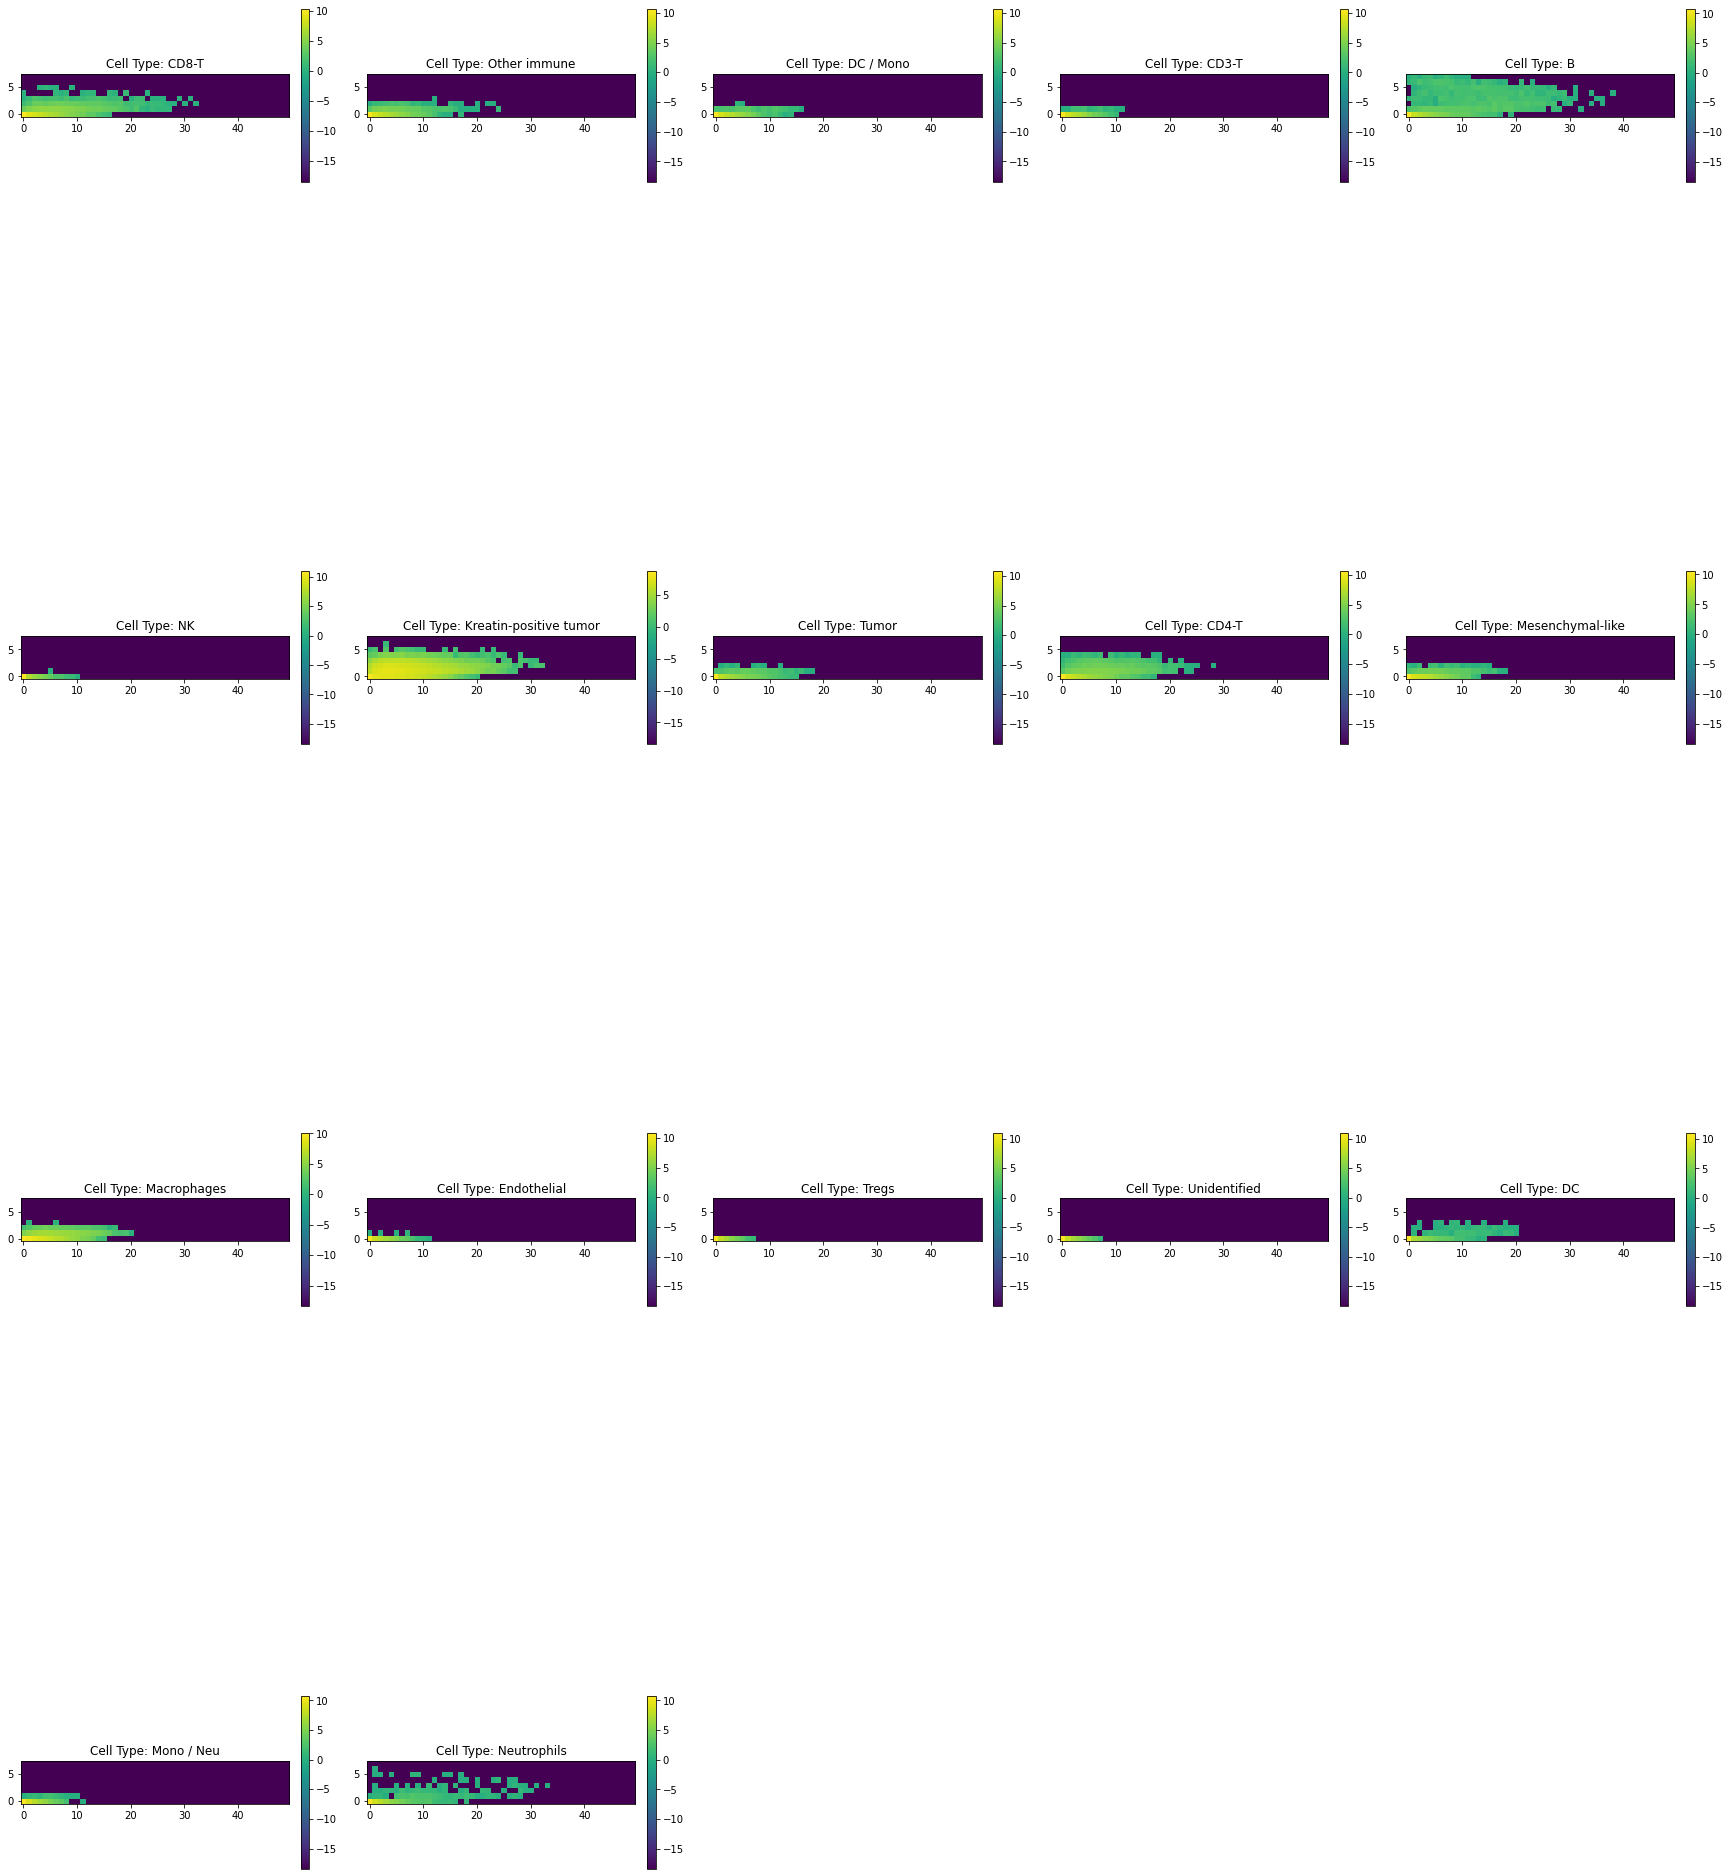

In [150]:
eps = 0.00000001
plt.figure(figsize=(30, 50))
for i in range(len(CELL_TYPES)):
    plt.subplot(5, 5, i+1)
    plt.title("Cell Type: {}".format(CELL_TYPES[i]))
    plt.imshow(np.log(histograms[i] + eps), origin='lower')
    plt.colorbar(fraction=0.03, pad=0.04)
plt.show()

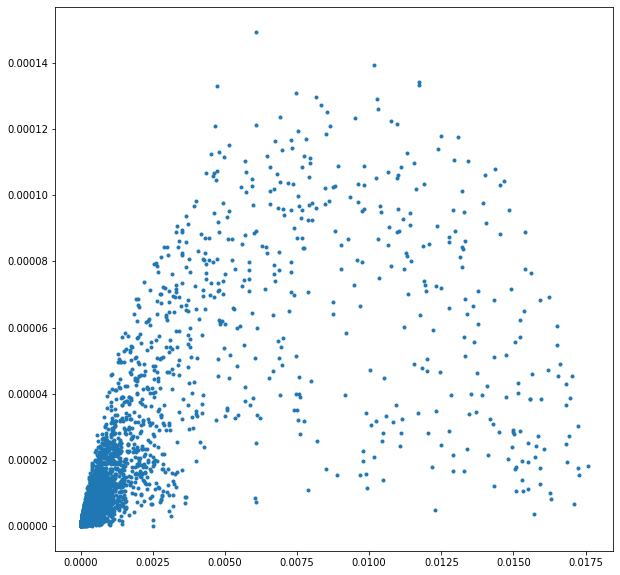

In [157]:
plt.figure(1, figsize=(10, 10))
#plt.plot(sites[:, 6], gradients[:, 6], '.')
plt.plot(sites[:, 4], gradients[:, 4], '.')
#plt.xlim(0, 0.002)
#plt.ylim(0, 0.00005)
plt.show()

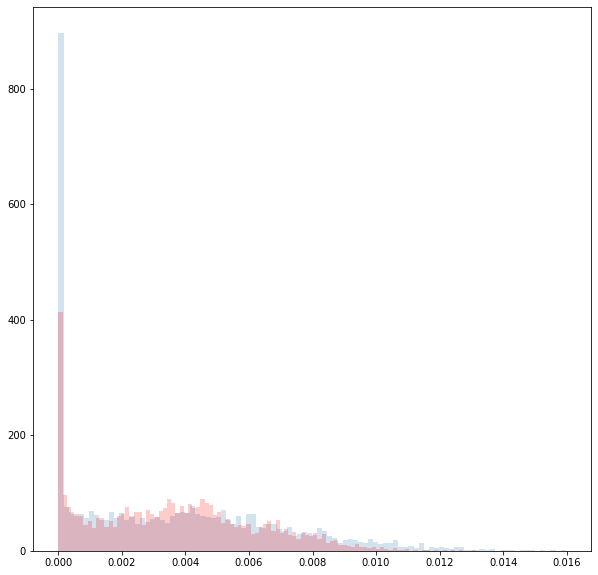

In [30]:
plt.figure(1, figsize=(10, 10))
plt.hist(sites[:, 6], bins=100, alpha = 0.2)
plt.hist(sites_25[:, 6], bins=100, color='red', alpha=0.2)
plt.show()

In [31]:
print(np.mean(sites[:, 6]), np.mean(sites_25[:, 6]))
print(sites[:, 6].shape, sites_25[:, 6].shape)

0.0035682895377025067 0.0036164774110500554
(4000,) (4000,)


In [ ]:
plt.hist(pc_original[:, 1], bins=100, alpha=0.2)
plt.hist(pc_original_25[:, 1], bins=100, color='red', alpha=0.2)
plt.show()

In [ ]:
plt.hist(pc_original[:, 2], bins=100, alpha=0.2)
plt.hist(pc_original_25[:, 2], bins=100, color='red', alpha=0.2)
plt.show()

## Random Stuff

In [198]:
CELL_TYPES = ['CD8-T', 'Other immune', 'DC / Mono', 'CD3-T', 'B', 'NK', 'Keratin-positive tumor', 'Tumor', 
              'CD4-T', 'Mesenchymal-like', 'Macrophages', 'Endothelial', 'Tregs', 'Unidentified', 'DC', 'Mono / Neu', 
              'Neutrophils']
#patient_ids = [1, 2, 3, 4, 5]
patient_ids = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41]
N_SITE = 1000
RADIUS = 25
ROOT_DATA_PATH = "../../data/cell_positions_data"
PC_components = 3

abs_log_ca_list = generate_abundance_matrix(CELL_TYPES, patient_ids, N_SITE, RADIUS, method='gaussian', snr=3, root=ROOT_DATA_PATH)
sites, patients_ids, gradients = join_abundance_matrices(abs_log_ca_list)

std_sites = (sites - sites.mean(0)) / sites.std(0)
#k = 3
#std_sites = np.log(sites + k)

pca_original = PCA()
pc_original = pca_original.fit_transform(std_sites)

In [ ]:
AA_3D = ArchetypalAnalysis(n_archetypes = 4, 
                        tolerance = 0.001, 
                        max_iter = 200, 
                        random_state = 0, 
                        C = 0.0001, 
                        initialize = 'random',
                        redundancy_try = 30)
AA_3D.fit_transform(pc_original[:, :PC_components])

In [ ]:
def round2one(v):
    return v if v <= 1.0 else 1.0
color_map = np.array([[255, 0, 0], [0, 153, 51], [0, 0, 255], [255, 255, 0]]).T
sites_archetype = [np.array([round2one(x) for x in color_mapper(color_map, c)/255]) for c in AA_3D.alfa.T]
p = np.array(sites_archetype)
p[p > 1]

In [ ]:
plot_eigenvalues([], pca_original.explained_variance_)

In [ ]:
pc_original.shape

In [184]:
gradients.shape

(4000, 17)

0.84% Total Exp. Var.


<IPython.core.display.Javascript object>


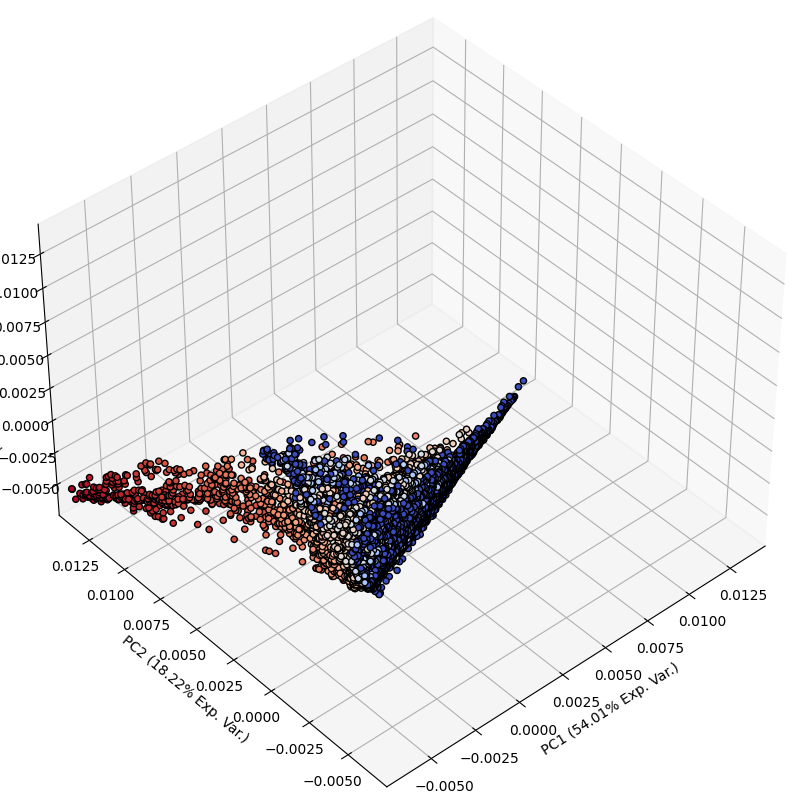

<module 'matplotlib.pyplot' from '/home/fabio.lipreri/.local/lib/python3.6/site-packages/matplotlib/pyplot.py'>

In [38]:
%matplotlib notebook
CELL_TYPES = ['CD8-T', 'Other immune', 'DC / Mono', 'CD3-T', 'B', 'NK', 'Keratin-positive tumor', 'Tumor', 
              'CD4-T', 'Mesenchymal-like', 'Macrophages', 'Endothelial', 'Tregs', 'Unidentified', 'DC', 'Mono / Neu', 
              'Neutrophils']
plot_3Dscatter_pca(pc_original, pca_original.explained_variance_ratio_, labels=np.log(1e-6+sites[:, 4]), cmap=plt.cm.coolwarm)#, labels=sites_archetype, archetypes=AA_3D.archetypes)

0.78% Total Exp. Var.


<IPython.core.display.Javascript object>


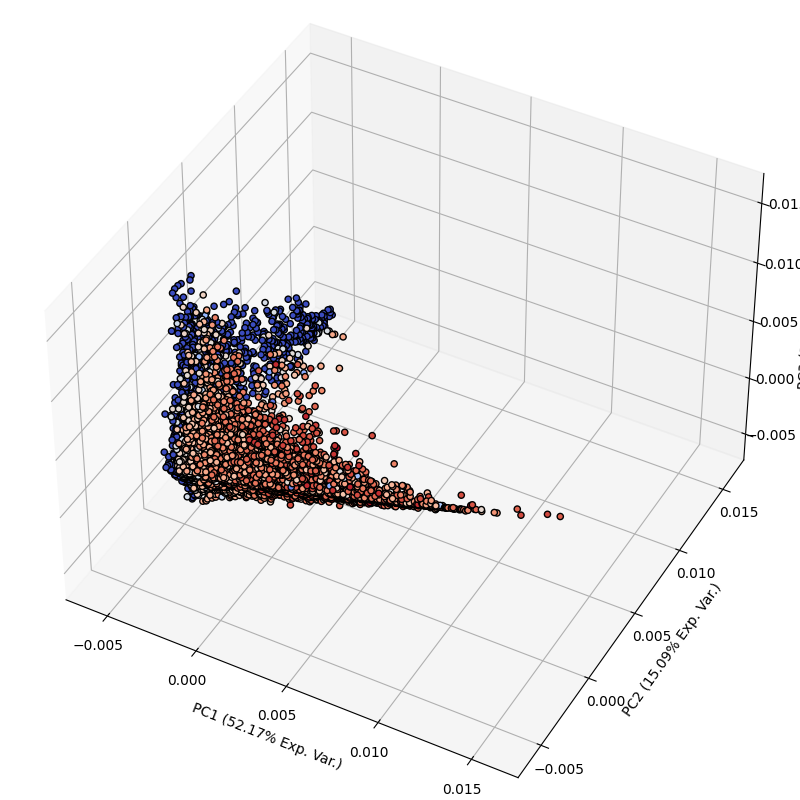

In [52]:
plt = plot_3Dscatter_pca(pc_original, pca_original.explained_variance_ratio_, labels=np.log(1e-6+gradients[:, 6]), cmap=plt.cm.coolwarm)
plt.show()#, labels=sites_archetype, archetypes=AA_3D.archetypes)

In [49]:
CELL_TYPES = ['CD8-T', 'Other immune', 'DC / Mono', 'CD3-T', 'B', 'NK', 'Keratin-positive tumor', 'Tumor', 
              'CD4-T', 'Mesenchymal-like', 'Macrophages', 'Endothelial', 'Tregs', 'Unidentified', 'DC', 'Mono / Neu', 
              'Neutrophils']
#patient_ids = [1, 2, 3, 4, 5]
patient_ids = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41]
N_SITE = 500
RADIUS = 15
ROOT_DATA_PATH = "../../data/cell_positions_data"
PC_components = 3

abs_log_ca_list = generate_abundance_matrix(CELL_TYPES, patient_ids, N_SITE, RADIUS, method='gaussian', snr=3, root=ROOT_DATA_PATH)
sites, patients_ids, gradients = join_abundance_matrices(abs_log_ca_list)

std_sites = (sites - sites.mean(0)) / sites.std(0)
#k = 3
#std_sites = np.log(sites + k)

pca_original = PCA()
pc_original = pca_original.fit_transform(sites)

<IPython.core.display.Javascript object>


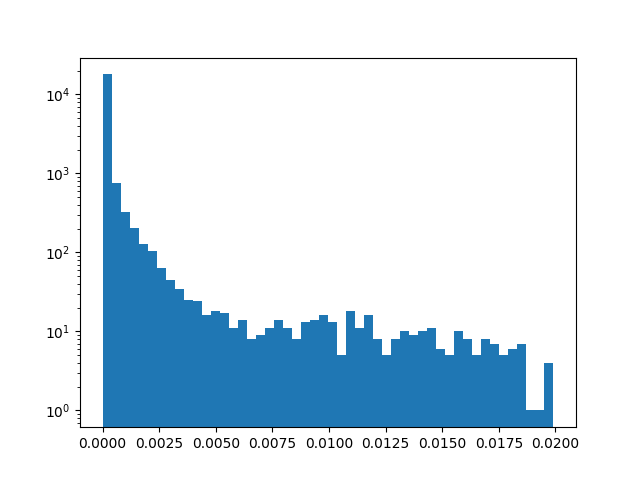

In [51]:
plt.hist(sites[:, 4], bins=50, log=True)
plt.show()

In [ ]:
plot_3Dscatter_pca(pc_original, pca_original.explained_variance_ratio_, labels=patients_ids, archetypes=AA_3D.archetypes)

In [ ]:
%matplotlib notebook
n_patients = 10
idx = patients_ids<n_patients
plot_3Dscatter_pca(pc_original[idx, :], pca_original.explained_variance_ratio_, labels=patients_ids[idx], archetypes=AA_3D.archetypes)

In [ ]:
plot_scatter_pca(pc_original[idx, :], pca_original.explained_variance_ratio_, labels=patients_ids[idx])